In [21]:
import osmnx as ox
import networkx as nx
import pandas as pd

## What can you do with OSMNX

* Graph from place
* Shape from place
* Graph from bbox
* Graph from point

### Useful links:
* https://geoffboeing.com/2016/11/osmnx-python-street-networks/ (overview)
* https://osmnx.readthedocs.io/en/stable/ (documentation)
* https://github.com/gboeing/osmnx-examples/ (more examples)

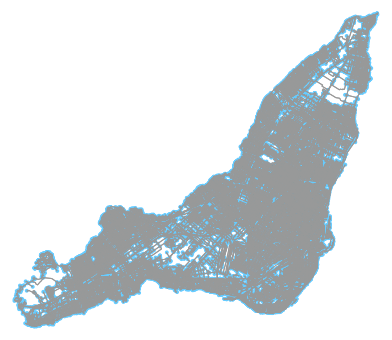

(<Figure size 714.888x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe6e251d9b0>)

In [10]:
ox.plot_graph(ox.graph_from_place("Island of Montreal, Canada"))

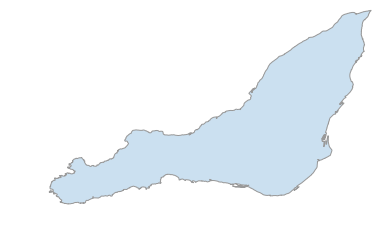

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe69494e048>)

In [9]:
ox.plot_shape(ox.gdf_from_place("Island of Montreal, Canada"))

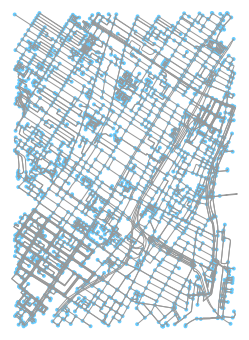

(<Figure size 443.504x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe6df0b7358>)

In [11]:
ox.plot_graph(ox.graph_from_bbox(45.52, 45.49, -73.55, -73.58))

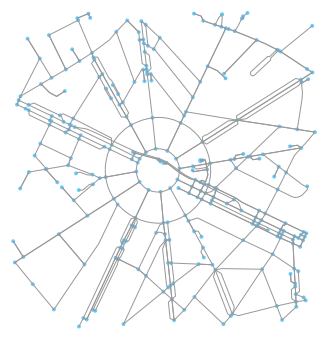

(<Figure size 631.929x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe6dc27de10>)

In [13]:
ox.plot_graph(ox.graph_from_point((48.87378, 2.29504), distance=500))

In [19]:
# can get stats from graph we created
G = ox.graph_from_address("Arc de Triomphe, Paris")

In [23]:
stats = ox.basic_stats(G)
pd.Series(stats)

n                                                                             1146
m                                                                             2383
k_avg                                                                      4.15881
intersection_count                                                             989
streets_per_node_avg                                                       3.09075
streets_per_node_counts          {0: 0, 1: 157, 2: 3, 3: 626, 4: 320, 5: 27, 6:...
streets_per_node_proportion      {0: 0.0, 1: 0.13699825479930192, 2: 0.00261780...
edge_length_total                                                           130123
edge_length_avg                                                            54.6045
street_length_total                                                        98846.8
street_length_avg                                                          57.9746
street_segments_count                                                         1705
node

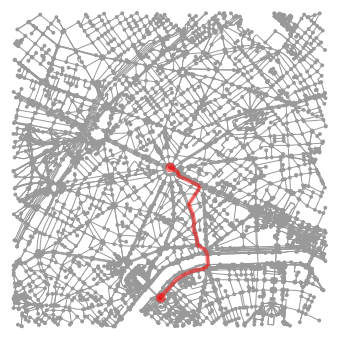

In [30]:
start_loc = (48.8737787, 2.2950396) # eiffel tower
end_loc = (48.85815, 2.29479) # arc de triomphe

north = max([start_loc[0], end_loc[0]])
south = min([start_loc[0], end_loc[0]])
east = max([start_loc[1], end_loc[1]])
west = min([start_loc[1], end_loc[1]])

G = ox.graph_from_point(start_loc, distance=2000)

start_node = ox.get_nearest_node(G, start_loc)
endn_node = ox.get_nearest_node(G, end_loc)

route = nx.shortest_path(G, start_node, end_node)
fig, ax = ox.plot_graph_route(G, route)